<a href="https://colab.research.google.com/github/rhodes-byu/cs180-winter25/blob/main/notebooks/05c-eda-penguins-example-plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# Palmer Penguins Dataset: Overview

The Palmer Penguins dataset contains data about three species of penguins observed in the Palmer Archipelago, Antarctica. The dataset was collected by Dr. Kristen Gorman and the Palmer Station LTER (Long Term Ecological Research) Program. It serves as a popular alternative to the Iris dataset for data exploration, statistical analysis, and machine learning practice due to its richer set of features and categorical variables.

Objective:

The primary goal of working with the Palmer Penguins dataset is to explore relationships between penguin species and their physical characteristics, as well as to perform classification tasks, such as predicting the species of a penguin based on measurable features. The dataset also offers an opportunity to practice data cleaning and handling missing values, as there are some missing entries.

Dataset Features:

The dataset consists of 344 rows and 7 columns. The columns are:

	1.	species: Categorical feature indicating the penguin species (Adélie, Chinstrap, Gentoo).
	2.	island: Categorical feature representing the island where the penguin was observed (Biscoe, Dream, Torgersen).
	3.	bill_length_mm: Continuous numerical feature representing the length of the penguin’s bill (in millimeters).
	4.	bill_depth_mm: Continuous numerical feature representing the depth of the penguin’s bill (in millimeters).
	5.	flipper_length_mm: Continuous numerical feature representing the penguin’s flipper length (in millimeters).
	6.	body_mass_g: Continuous numerical feature representing the penguin’s body mass (in grams).
	7.	sex: Categorical feature indicating the penguin’s sex (male or female), though some entries are missing.


1.	Understand the Data:
	* The dataset is loaded from seaborn.
	* First few rows and data types are printed.
	* Missing values are checked.
2.	Detect and Address Outliers and Missing Values:
	* Visualizing missing values using a heatmap.
  * Boxplots for detecting potential outliers.
	* Decide whether to drop or impute missing values.
3.	Describe Shape of Data using Univariate Analysis:
	* Histograms for numerical variables to check distributions.
	* Count plots for categorical variables like species.
4.	Identify Feature Relationships using Bivariate Analysis:
	* Scatter plots and pair plots to visualize relationships between numerical variables and categories.
	* Correlation matrix heatmap to examine the relationships between numerical variables.
5.	Multivariate Analysis:
	* Grouping box plots to compare flipper lengths across species and gender.


In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Palmer Penguins dataset from seaborn
penguins = sns.load_dataset('penguins')

# Display the first few rows of the dataset
penguins

c:\Users\rhodes8\AppData\Local\miniconda3\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\rhodes8\AppData\Local\miniconda3\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\rhodes8\AppData\Local\miniconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [2]:
# Inspect data structure and data types
print("\nData Info:")
print(penguins.info())

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(penguins.describe())



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None

Descriptive Statistics:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000   

In [3]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [4]:
# Checking for missing values
print("\nMissing Values:")
print(penguins.isnull().sum())


Missing Values:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


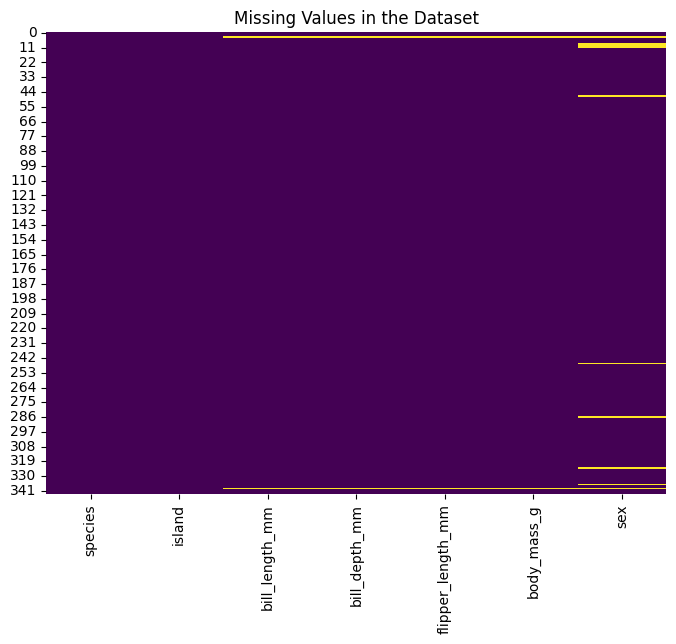

In [5]:
# Visualize missing data using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(penguins.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

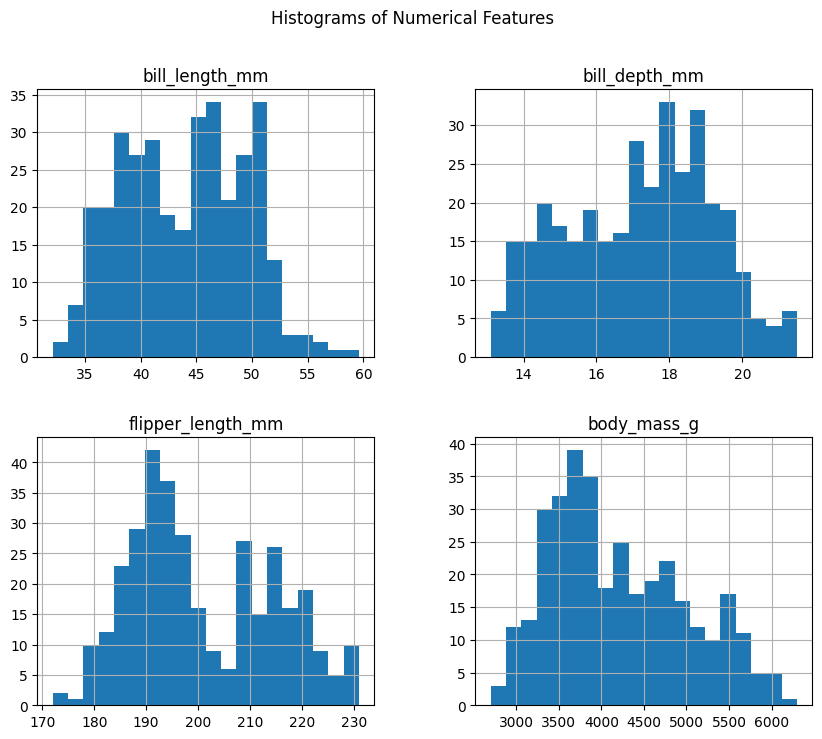

In [6]:
# Univariate Analysis

# Histogram for numerical variables
penguins.hist(figsize=(10, 8), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

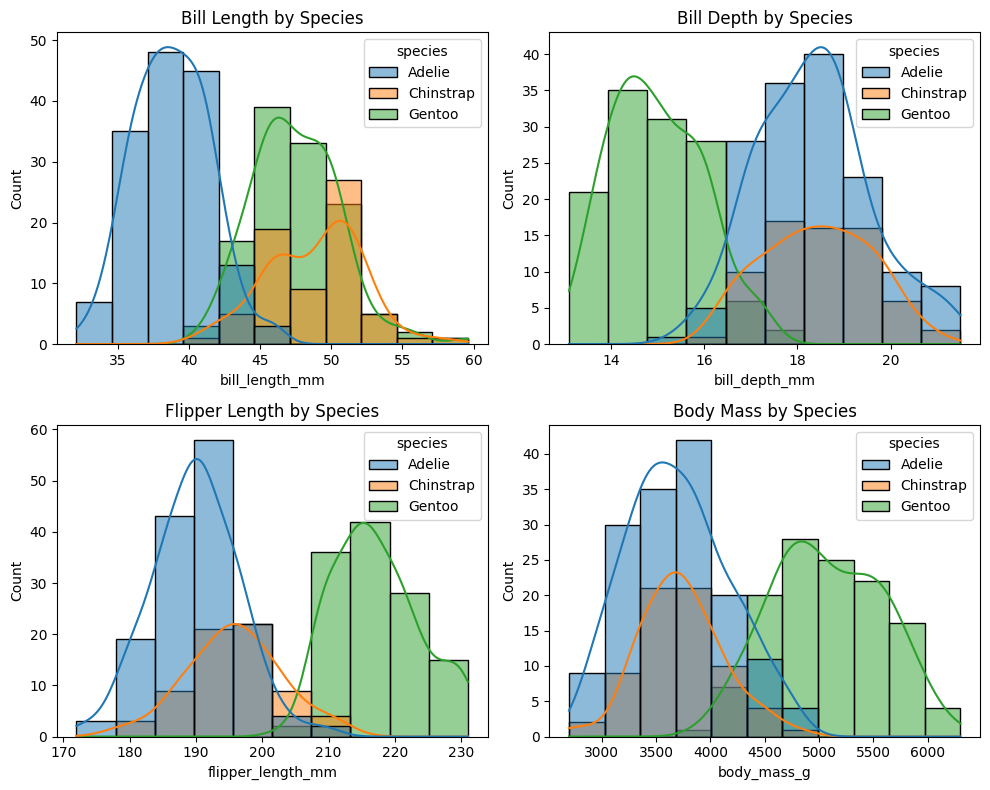

In [7]:
# Add grouped by hist plots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
titles = ['Bill Length by Species', 'Bill Depth by Species', 'Flipper Length by Species', 'Body Mass by Species']

for ax, feature, title in zip(axes.flatten(), features, titles):
    sns.histplot(data=penguins, x=feature, hue='species', kde=True, ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()


In [8]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [9]:
data2 = penguins.drop('body_mass_g', axis=1)
data2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex
0,Adelie,Torgersen,39.1,18.7,181.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,Female


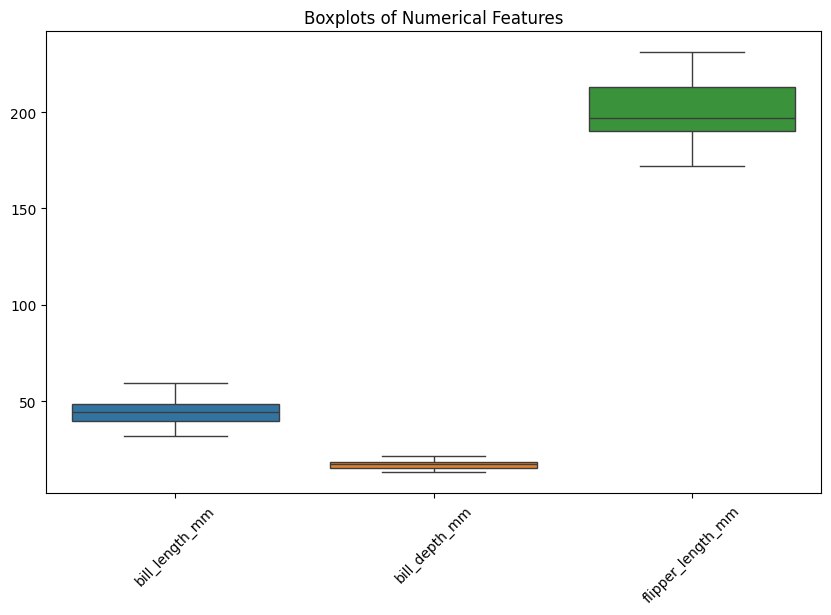

In [10]:
# Boxplots for detecting outliers
plt.figure(figsize=(10, 6))
data2 = penguins.drop('body_mass_g', axis=1)
sns.boxplot(data=data2.dropna())
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

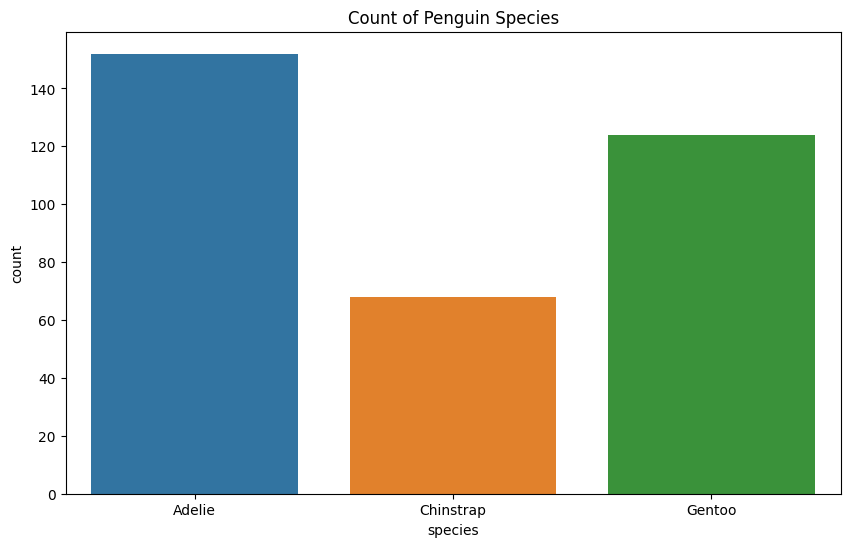

In [11]:
# Count plot for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='species', hue='species', data=penguins)
plt.title('Count of Penguin Species')
plt.show()

In [12]:
# Calculate descriptive statistics by species
penguins[["bill_length_mm", "species"]].groupby(by="species").describe()

bill_length_mm                                                   \
                   count       mean       std   min    25%    50%     75%   
species                                                                     
Adelie             151.0  38.791391  2.663405  32.1  36.75  38.80  40.750   
Chinstrap           68.0  48.833824  3.339256  40.9  46.35  49.55  51.075   
Gentoo             123.0  47.504878  3.081857  40.9  45.30  47.30  49.550   

                 
            max  
species          
Adelie     46.0  
Chinstrap  58.0  
Gentoo     59.6

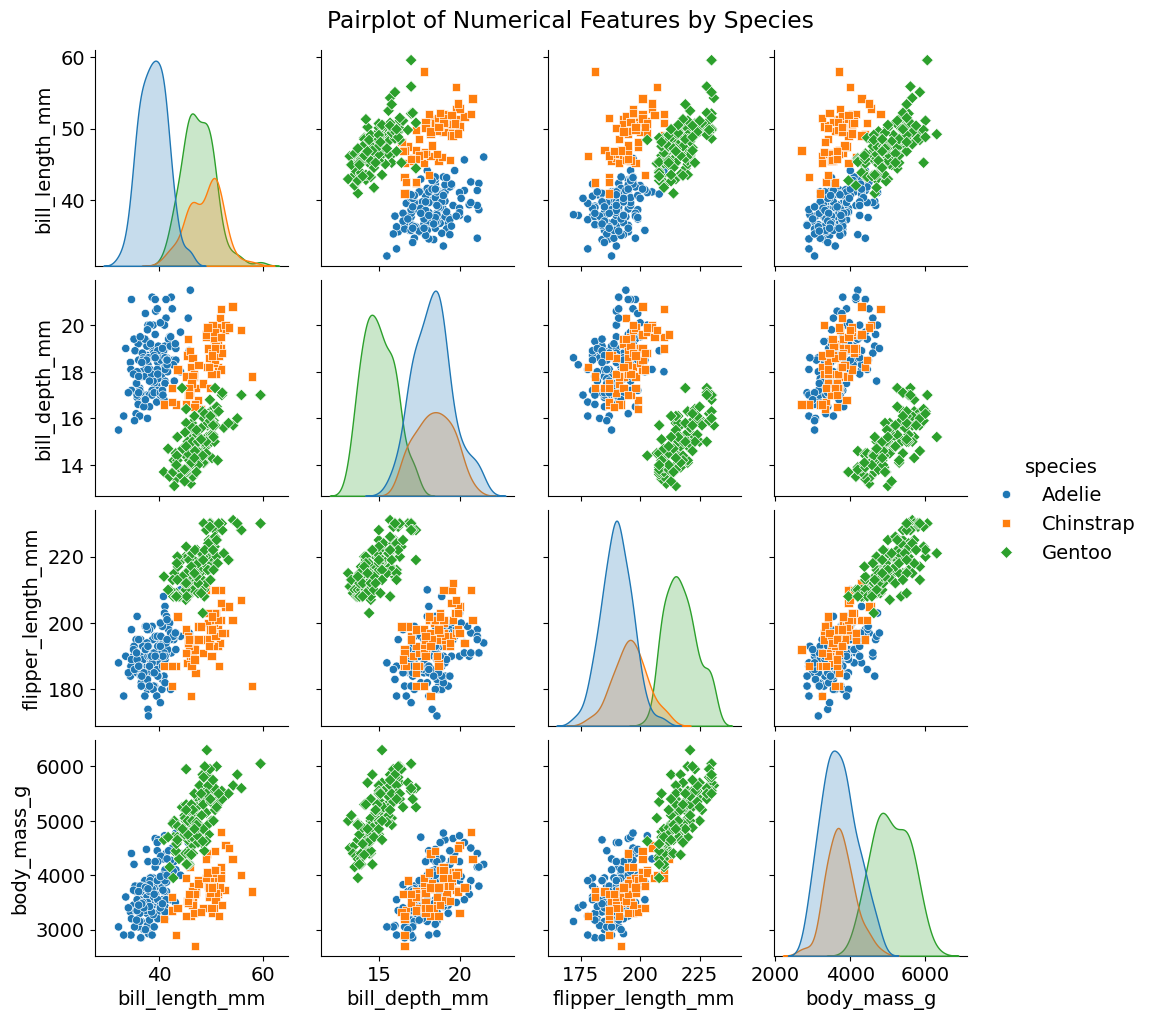

In [13]:
# Bivariate Analysis

# Pairplot of numerical variables colored by species
plt.rcParams.update({'font.size': 14})
sns.pairplot(penguins.dropna(), hue='species', markers=["o", "s", "D"])
plt.suptitle('Pairplot of Numerical Features by Species', y=1.02)
plt.show()

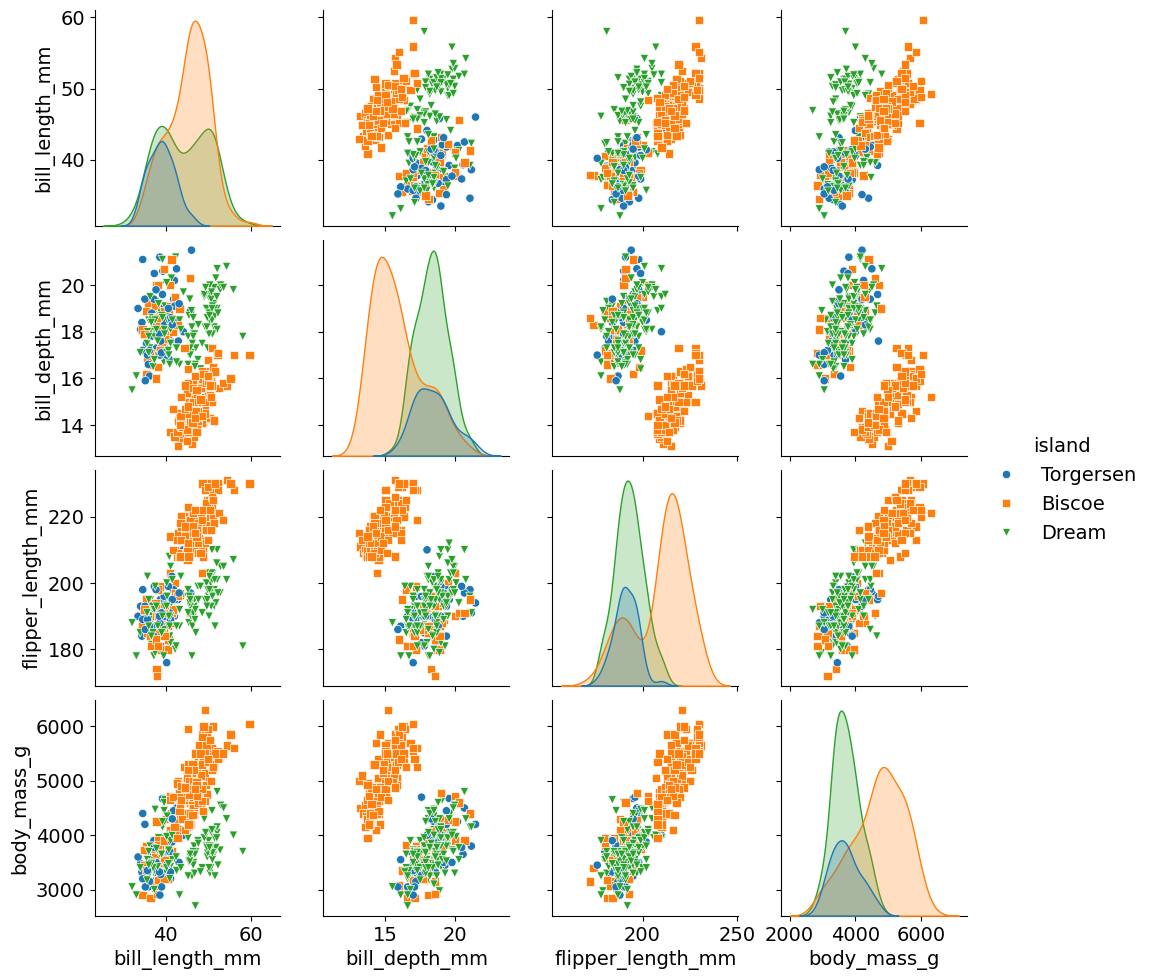

In [14]:
# Does island affect the relationships?
plt.rcParams.update({'font.size': 14})
p = sns.pairplot(penguins, hue='island', markers=['o', 's', 'v'])
plt.show()

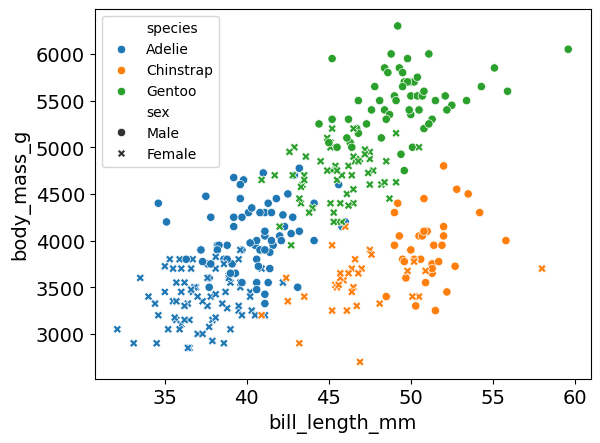

In [15]:
# Combine sex and species in a single scatterplot
p = sns.scatterplot(
    data=penguins, x='bill_length_mm', y='body_mass_g', hue='species', style='sex'
)
plt.legend(loc=2, prop={'size': 10})  # Adjust the location of the legend to upper left corner and font size to 10
plt.show()

In [16]:
# Contingency table for species and sex
pd.crosstab(index=penguins['species'], columns=penguins['sex'])

sex,Female,Male
species,,
Adelie,73,73
Chinstrap,34,34
Gentoo,58,61


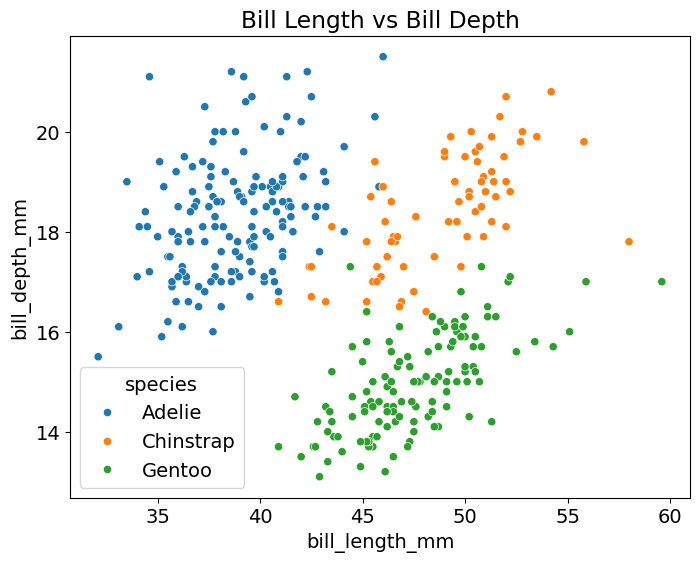

In [17]:
# Scatter plot of bill_length_mm vs bill_depth_mm
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=penguins)
plt.title('Bill Length vs Bill Depth')
plt.show()

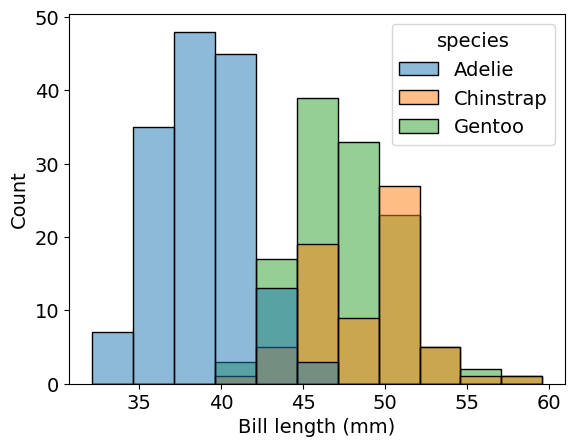

In [18]:
# Distribution of bill length by species
p = sns.histplot(data=penguins, x='bill_length_mm', hue='species')
p.set_xlabel('Bill length (mm)', fontsize=14)
p.set_ylabel('Count', fontsize=14)
plt.show()

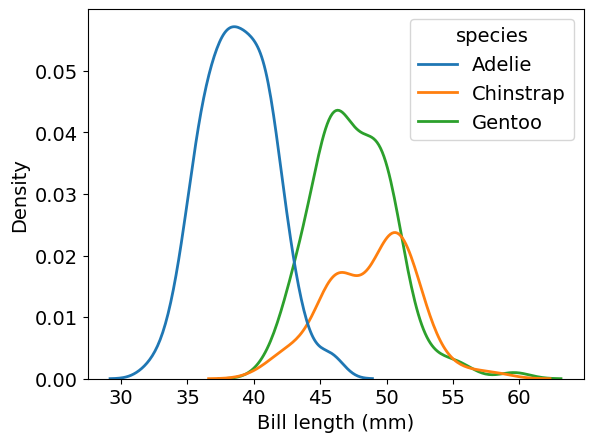

In [19]:
# Distribution of bill length by species
p = sns.kdeplot(data=penguins, x='bill_length_mm', hue='species', linewidth=2)
p.set_xlabel('Bill length (mm)', fontsize=14)
p.set_ylabel('Density', fontsize=14)
plt.show()

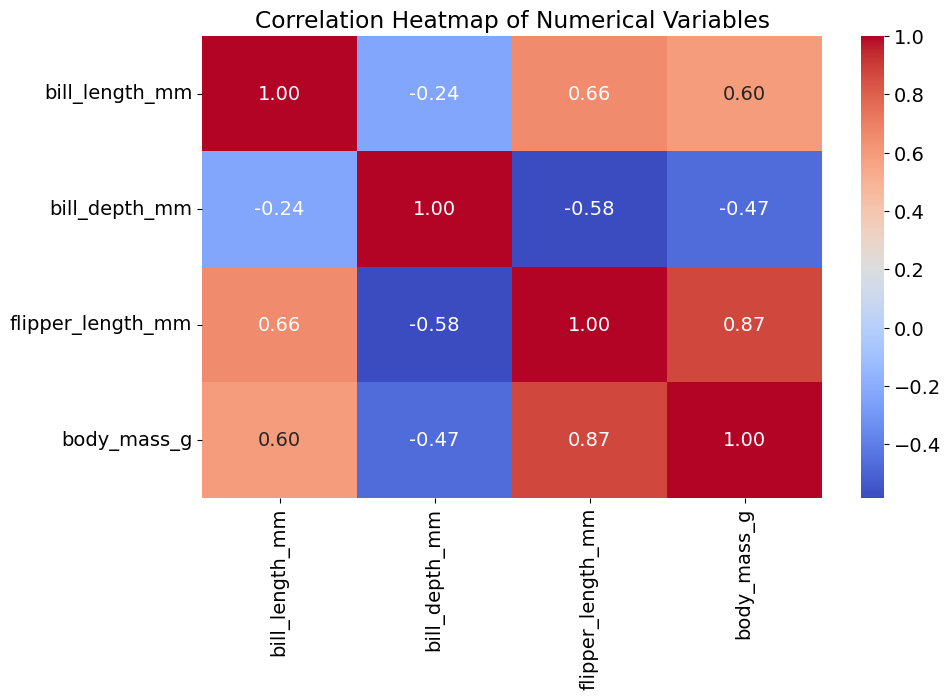

In [20]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(penguins.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

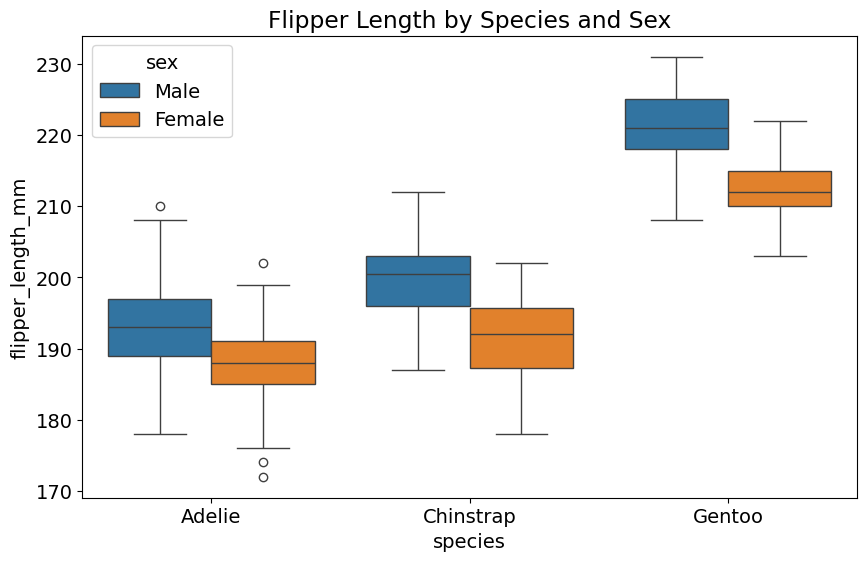

In [21]:
# Multivariate Analysis

# Boxplot of flipper length by species and sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='flipper_length_mm', hue='sex', data=penguins)
plt.title('Flipper Length by Species and Sex')
plt.show()

In [22]:
# Handling Missing Data (if needed)

# Strategy 1: Drop rows with missing values
penguins_cleaned = penguins.dropna()
print(f"\nShape of data after dropping missing values: {penguins_cleaned.shape}")


Shape of data after dropping missing values: (333, 7)


In [23]:
# Strategy 2: Fill missing values (Example: filling with mean)
penguins_filled = penguins.fillna(penguins.mean(numeric_only=True))
print(f"\nMissing values after filling numeric NaNs with mean:\n{penguins_filled.isnull().sum()}")



Missing values after filling numeric NaNs with mean:
species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64


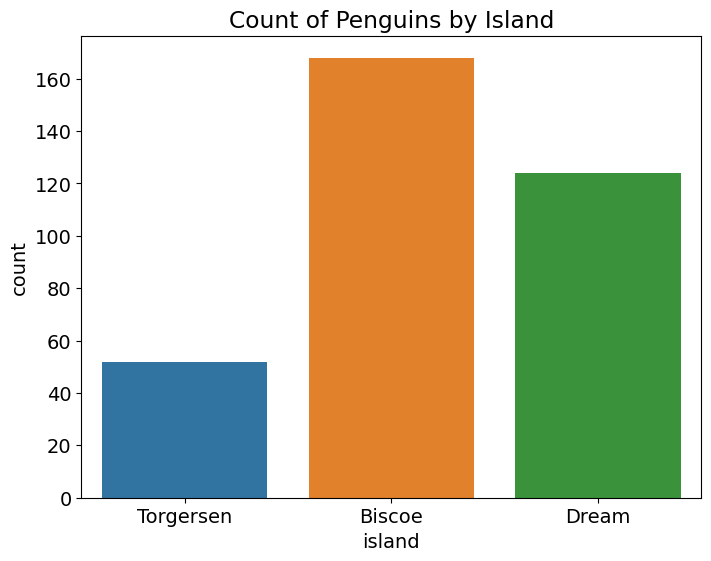

In [24]:
# Count plot for the "island" feature
plt.figure(figsize=(8, 6))
sns.countplot(x='island', hue='island', data=penguins)
plt.title('Count of Penguins by Island')
plt.show()
